In [1]:
import hdb_resale_model
from hdb_resale_model import model_stacker,data_transformer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
guru = pd.read_csv('./data_files/guru_reformatted.csv')
co99 = pd.read_csv('./data_files/99co_reformatted.csv')

# guru_input = guru.drop(['price','link'],axis=1)
# co99_input = co99.drop(['price','link'],axis=1)
# external_transformer = data_transformer()
# guru_input = external_transformer.fit(guru_input).scale(guru=True)
# co99_input = external_transformer.fit(co99_input).scale(guru=True)

# blender_model = model_stacker(load_model=True)

In [8]:
guru.columns

Index(['No of bedrooms', 'No of bathrooms', 'floor_area_sqm',
       'remaining_lease', 'LAT', 'LON', 'distance_to_primary_school',
       'distance_to_seconday_school', 'distance_to_junior_college',
       'distance_to_polytechnic', 'distance_to_mrt_lrt',
       'distance_to_preschool', 'price', 'link'],
      dtype='object')

In [5]:
guru_pred = blender_model.predict(guru_input)
co99_pred = blender_model.predict(co99_input)

In [6]:
guru['predicted_price'] = guru_pred 
guru['difference'] =  guru['price'] - guru['predicted_price']

co99['predicted_price'] = co99_pred 
co99['difference'] =  co99['price'] - co99['predicted_price']

In [7]:
cols = ['price','predicted_price','difference','link']
final_guru = guru[cols]
final_guru['source'] = 'Property Guru'
final_co99 = co99[cols]
final_co99['source'] = 'Co 99'
main = final_guru.append(final_co99)
main.sort_values(by='difference',inplace=True,ascending=False)

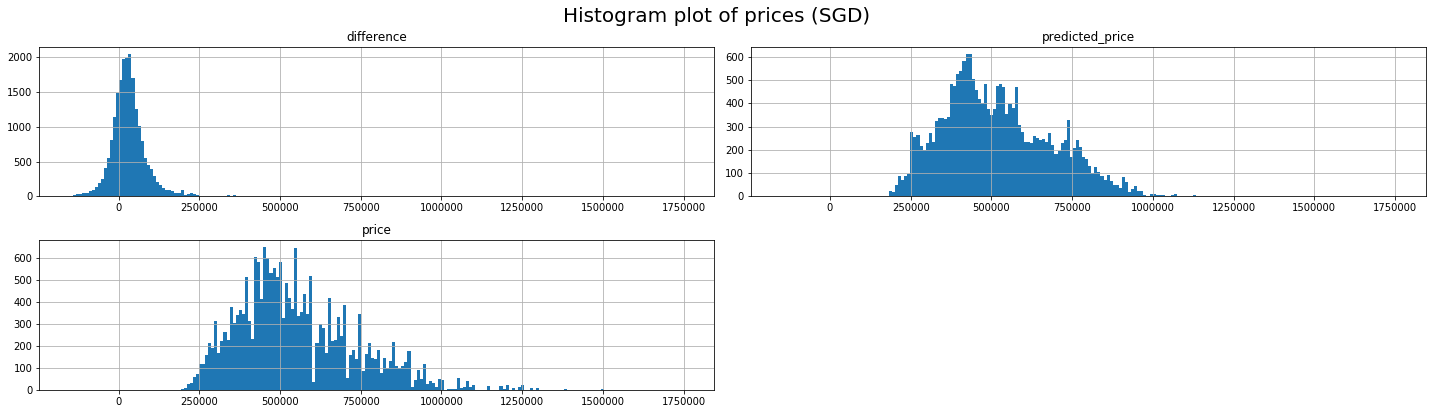

source
Co 99            30486.931647
Property Guru    35135.084598
Name: difference, dtype: float64

In [44]:
fig,ax = plt.subplots(figsize=(20,6))
main.hist(range=[-150000,1_750_000],bins=200,ax=ax)
plt.xticks(rotation=90)
plt.suptitle('Histogram plot of prices (SGD)',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

main.groupby('source')['difference'].mean()

You can observe here that prices are "rounded" to nicer numbers, given the number of noticable spikes at certain prices.

In [45]:
output_csv = main[abs(main['difference']) > 150_000]
main.to_csv('mispriced hdbs.csv',index=False)